In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from apriori import Apriori
from time import time
from helper import GetItemsetFromFile, GetSubsectionOfData, PrintTimeInfo, CreatePairDataFrame

In [2]:
# Get the retail data set
s_t = time()
retail_data = GetItemsetFromFile("retail.data")
f_t = time()
print("Time taken to read retail data: %.2f seconds" % (f_t - s_t))

Time taken to read retail data: 0.22 seconds


In [3]:
support_thresholds = [0.01, 0.02, 0.05]
data_sizes = [0.25, 0.33, 0.65]

In [4]:
random_time_pairings = []
# Run Apriori pairs with Random Sampling on 3 support threshholds and 3 pre-determined data sizes
random_item_pairings = []
for data_size in data_sizes:
    # Loop through each support to test on data
    for support in support_thresholds:
        data = GetSubsectionOfData(retail_data, data_size) # Get % of data
        new_support = support * data_size # reduce the support threshold relative to reduction in data

        s_t = time()    # Starting time
        occ, freq = Apriori(data, new_support, 2)
        f_t = time()    # Finishing time
        random_time_pairings.append((f_t - s_t))
        PrintTimeInfo("Random Sampled Apriori", (data_size * 100), (f_t - s_t), new_support, "pairs")
        random_item_pairings.append(freq)
        

Time taken to complete Random Sampled Apriori on 25% of data using pairs of retail data: 20.55 seconds with support: 0%
Time taken to complete Random Sampled Apriori on 25% of data using pairs of retail data: 8.01 seconds with support: 0%
Time taken to complete Random Sampled Apriori on 25% of data using pairs of retail data: 3.21 seconds with support: 1%
Time taken to complete Random Sampled Apriori on 33% of data using pairs of retail data: 18.00 seconds with support: 0%
Time taken to complete Random Sampled Apriori on 33% of data using pairs of retail data: 7.97 seconds with support: 0%
Time taken to complete Random Sampled Apriori on 33% of data using pairs of retail data: 2.56 seconds with support: 1%
Time taken to complete Random Sampled Apriori on 65% of data using pairs of retail data: 14.10 seconds with support: 0%
Time taken to complete Random Sampled Apriori on 65% of data using pairs of retail data: 5.43 seconds with support: 1%
Time taken to complete Random Sampled Apriori

In [19]:
# Run Apriori normally on 100% of data for all 3 support thresholds
apriori_item_pairings = []
for support in support_thresholds:
    s_t = time()
    occ, freq = Apriori(retail_data, support, 2)
    f_t = time()
    apriori_item_pairings.append(freq)
    PrintTimeInfo("Apriori", 100, (f_t - s_t), support, "pairs")

Time taken to complete Apriori on 100% of data using pairs of retail data: 13.12 seconds with support: 1%
Time taken to complete Apriori on 100% of data using pairs of retail data: 6.77 seconds with support: 2%
Time taken to complete Apriori on 100% of data using pairs of retail data: 4.93 seconds with support: 5%


In [20]:
# Count the number of pairs that are in the random sampling but not in the actual data
false_positives_list = np.zeros((9,1))
for i in range(len(random_item_pairings)):
    for j in range(len(apriori_item_pairings)):
        for pairing in random_item_pairings[i]:
            if pairing not in apriori_item_pairings[j]:
                false_positives_list[i] += 1

In [21]:
i = 0
for data_size in data_sizes:
    for support in support_thresholds:
        print("False positives for original support threshold %d%% but with %d%% of data is %d." % ((support * 100), (data_size * 100), false_positives_list[i]))
        i += 1

False positives for original support threshold 1% but with 25% of data is 2500.
False positives for original support threshold 2% but with 25% of data is 738.
False positives for original support threshold 5% but with 25% of data is 86.
False positives for original support threshold 1% but with 33% of data is 1558.
False positives for original support threshold 2% but with 33% of data is 408.
False positives for original support threshold 5% but with 33% of data is 40.
False positives for original support threshold 1% but with 65% of data is 337.
False positives for original support threshold 2% but with 65% of data is 51.
False positives for original support threshold 5% but with 65% of data is 3.


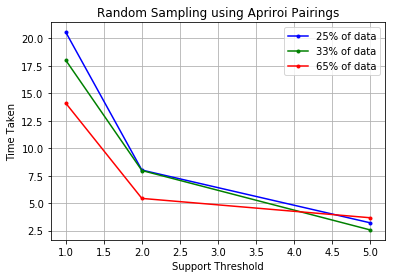

In [22]:
new_sup = [support * 100 for support in support_thresholds]
pl.plot(new_sup, random_time_pairings[0:3], '.-', color='blue', label="25% of data")
pl.plot(new_sup, random_time_pairings[3:6], '.-', color='green', label="33% of data")
pl.plot(new_sup, random_time_pairings[6:9], '.-', color='red', label="65% of data")
pl.legend(loc="upper right")
pl.title("Random Sampling using Apriroi Pairings")
pl.xlabel("Support Threshold")
pl.ylabel("Time Taken")
pl.grid()
pl.show()